
Flagged Anomalies:
     Monthly_Transfer  anomaly
10     553128.458739  Anomaly
20     737834.951417  Anomaly
21      69012.744796  Anomaly
63     918106.644665  Anomaly
98     937328.762465  Anomaly


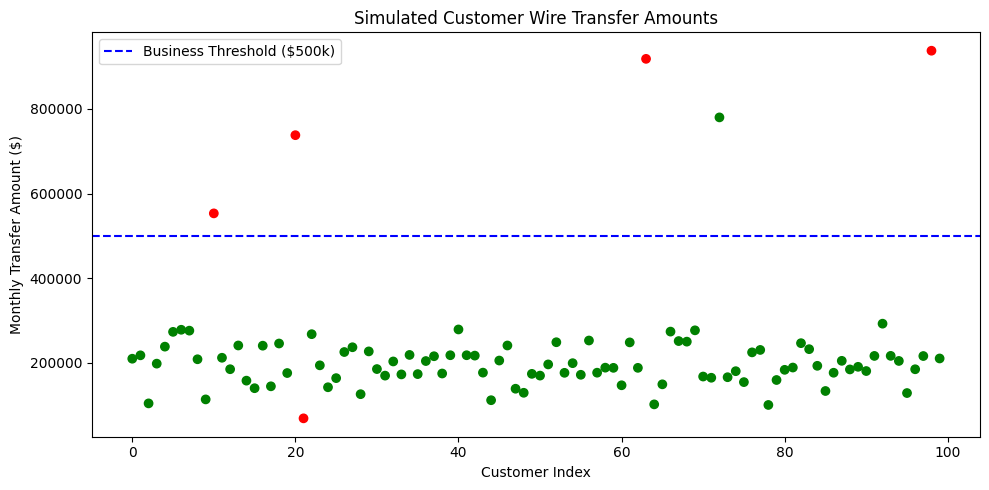

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate random transfer data (just for demo/testing)
np.random.seed(42)

# Simulate normal transactions between $50k to $300k
normal_data = np.random.normal(loc=200000, scale=50000, size=95)

# Simulate a few high-value anomalous transactions
anomalies = np.random.uniform(low=550000, high=1000000, size=5)

# Combine and shuffle the data
transfer_data = np.concatenate((normal_data, anomalies))
np.random.shuffle(transfer_data)

# Create a DataFrame
df = pd.DataFrame({'Monthly_Transfer': transfer_data})

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[['Monthly_Transfer']])
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Print the anomalies detected
print("\nFlagged Anomalies:\n", df[df['anomaly'] == 'Anomaly'])

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Monthly_Transfer'],
            c=df['anomaly'].map({'Normal': 'green', 'Anomaly': 'red'}))
plt.axhline(500000, color='blue', linestyle='--', label='Business Threshold ($500k)')
plt.title('Simulated Customer Wire Transfer Amounts')
plt.xlabel('Customer Index')
plt.ylabel('Monthly Transfer Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()